In [2]:
import warnings
warnings.filterwarnings("ignore",category=PendingDeprecationWarning)

import numpy as np 
np.seterr(divide='ignore', invalid='ignore')

# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 22}

# matplotlib.rc('font', **font)

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import hddm as hddm
from sys import platform
sns.set("notebook", font_scale=1.3, rc={'figure.figsize':(15,10), 'xtick.labelsize': 15, 'ytick.labelsize': 15, 'font.size': 15}, style='whitegrid')

/Users/Krista/anaconda/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [3]:
analysis_path  = 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/model_traces/group_traces/'

if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/krista/'
    
fig_path = home +  'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/figures/new_figures/'


In [4]:
obs_traces_df = pd.read_csv(home + analysis_path + 'obs_aCPP_vB_group_traces.csv')
obs_traces_df=obs_traces_df.rename(columns=lambda x: x.strip())

In [5]:
sim_traces_df = pd.read_csv(home + analysis_path + 'sim_aCPP_vB_group_traces.csv')
sim_traces_df=sim_traces_df.rename(columns=lambda x: x.strip())

In [6]:
obs_ls_df = pd.read_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')
obs_ls_df=obs_ls_df.rename(columns=lambda x: x.strip())

filtered_obs_ls_df = obs_ls_df.loc[(obs_ls_df.shifted_epoch_trial < 7) & (obs_ls_df.shifted_epoch_trial > -2)]


In [7]:
obs_reg_estimates = pd.read_csv(home + 'Dropbox/loki_0/simple_rt_experiment_probabilityC/analysis/aggregated_data/gen_obs_reg_data.csv')
obs_reg_estimates=obs_reg_estimates.rename(columns=lambda x: x.strip())

In [8]:
current_dir = !pwd

In [9]:
current_dir[0]

'/Users/Krista/Documents/testing_learning_rates'

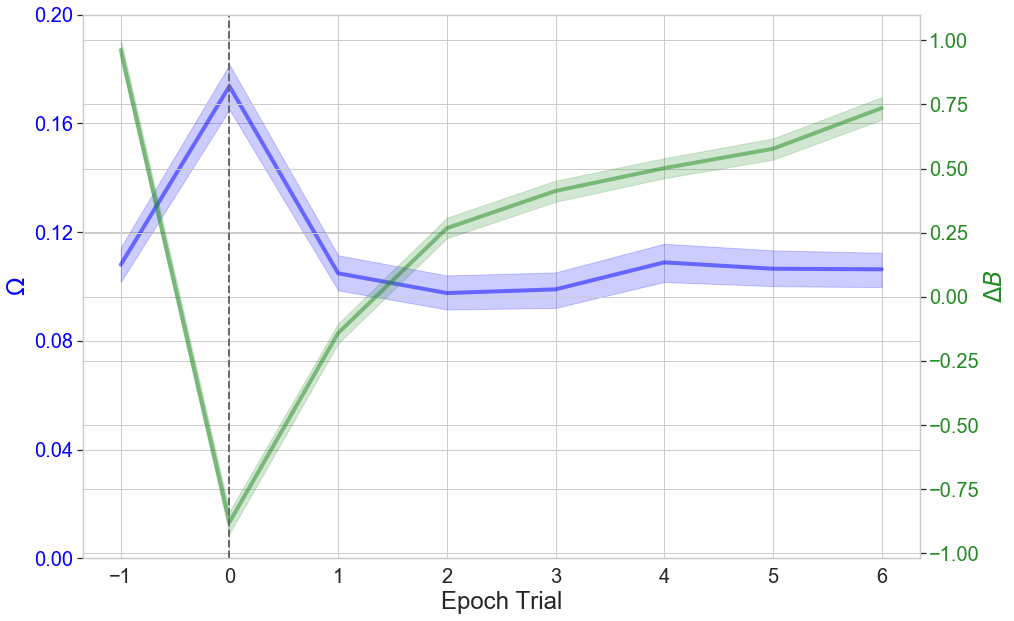

In [10]:
sns.set("notebook", font_scale=2, rc={'figure.figsize':(15,10), 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.size': 15}, style='whitegrid')

b_color = 'darkgreen'
cpp_color = 'mediumblue'

b_color = 'forestgreen'
cpp_color = 'blue'

fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=filtered_obs_ls_df, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=filtered_obs_ls_df, color=b_color, ax=ax2, linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
ax1.tick_params(axis='y', labelcolor=cpp_color)
ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.24, 0.04))
ax2.set_yticks(np.arange(-1, 1.25, 0.25))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

In [11]:
lc = filtered_obs_ls_df.loc[(obs_ls_df.condition == 'lc')]
hc = filtered_obs_ls_df.loc[(obs_ls_df.condition == 'hc')]

lv = filtered_obs_ls_df.loc[(obs_ls_df.condition == 'lv')]
hv = filtered_obs_ls_df.loc[(obs_ls_df.condition == 'hv')]

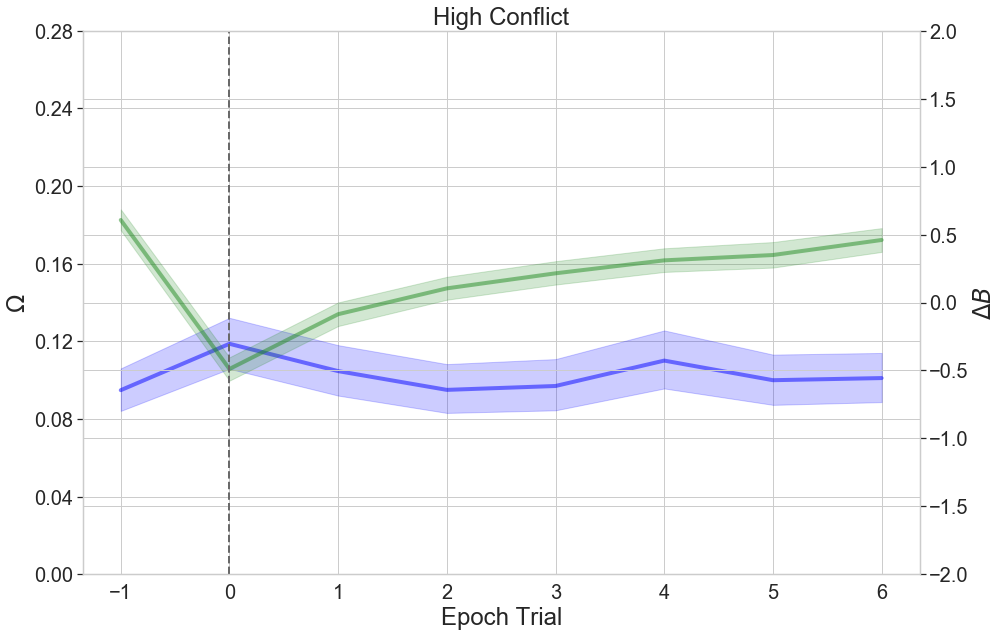

In [12]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$') 
ax1.set_ylabel(r'$\Omega$')  


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Conflict')

plt.savefig(fig_path+'hc_learning_ts.pdf', dpi=300)

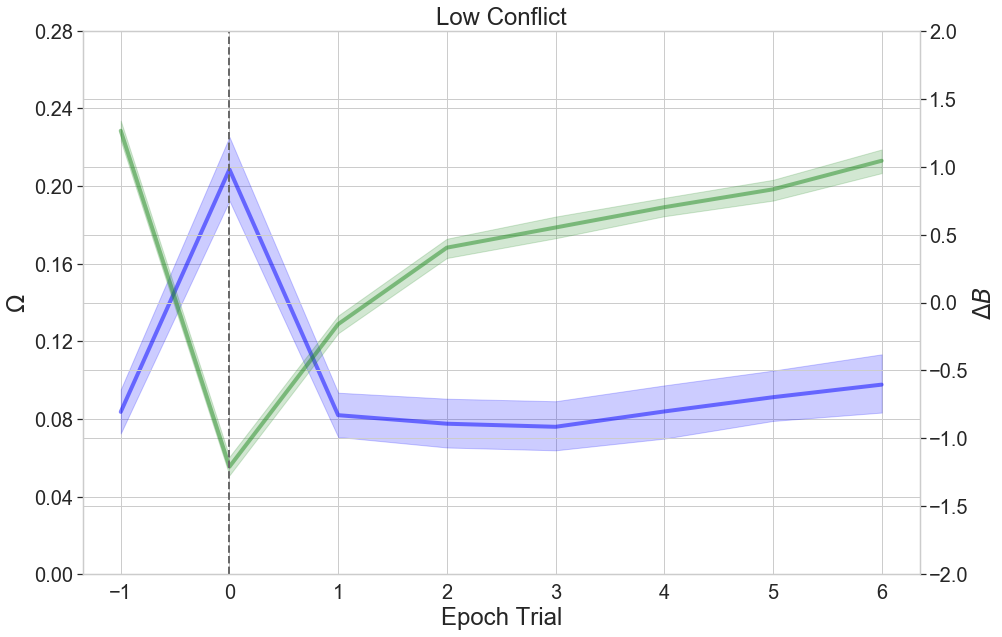

In [13]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$') 
ax1.set_ylabel(r'$\Omega$')  


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Conflict')

plt.savefig(fig_path+'lc_learning_ts.pdf', dpi=300)

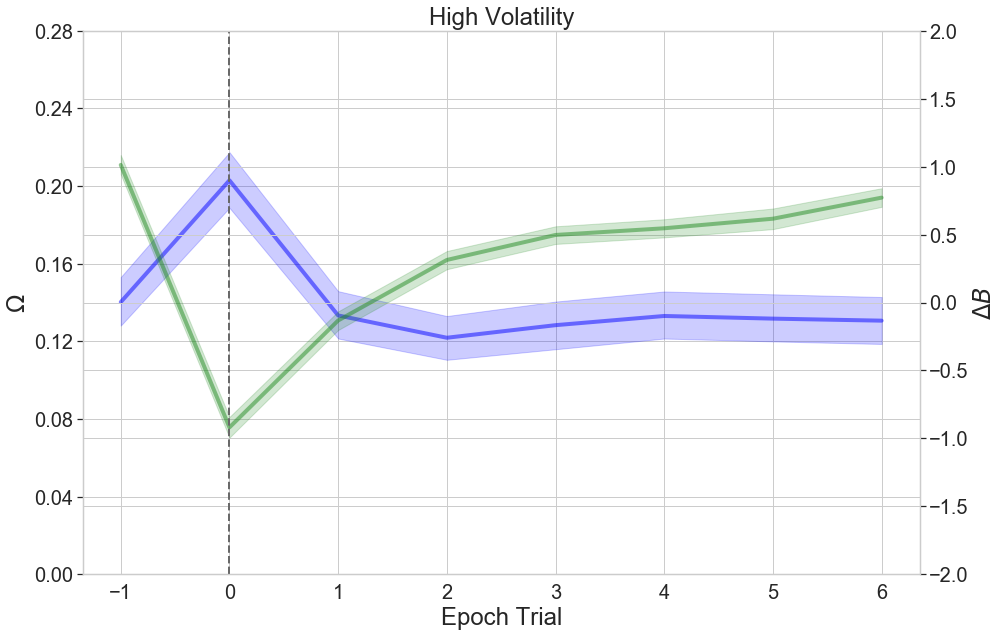

In [14]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$') 
ax1.set_ylabel(r'$\Omega$')  


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Volatility')

plt.savefig(fig_path+'hv_learning_ts.pdf', dpi=300)

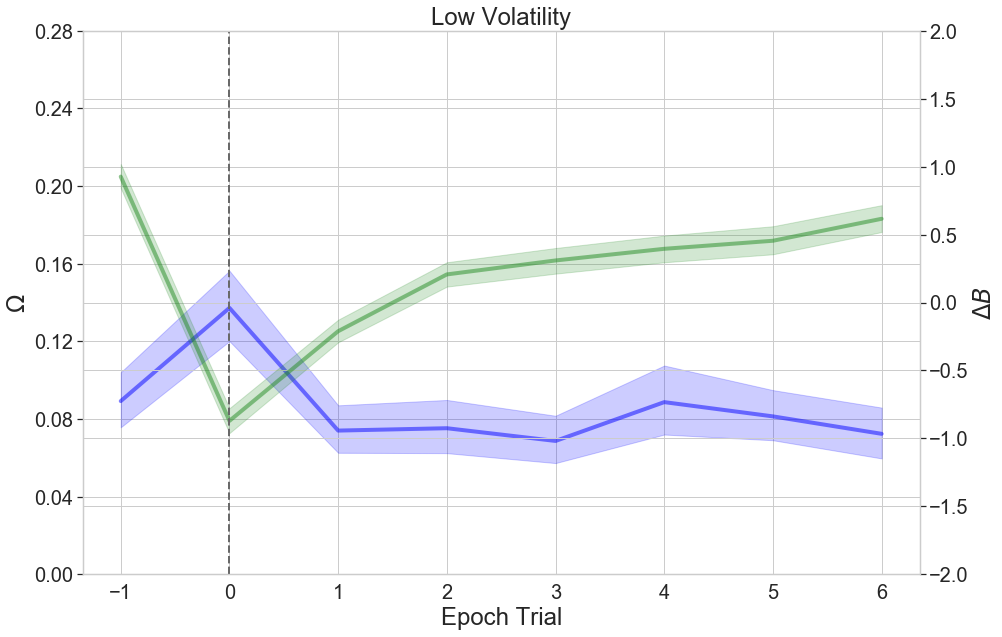

In [15]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$') 
ax1.set_ylabel(r'$\Omega$')  


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Volatility')

plt.savefig(fig_path+'lv_learning_ts.pdf', dpi=300)

# conceptual take-home figure

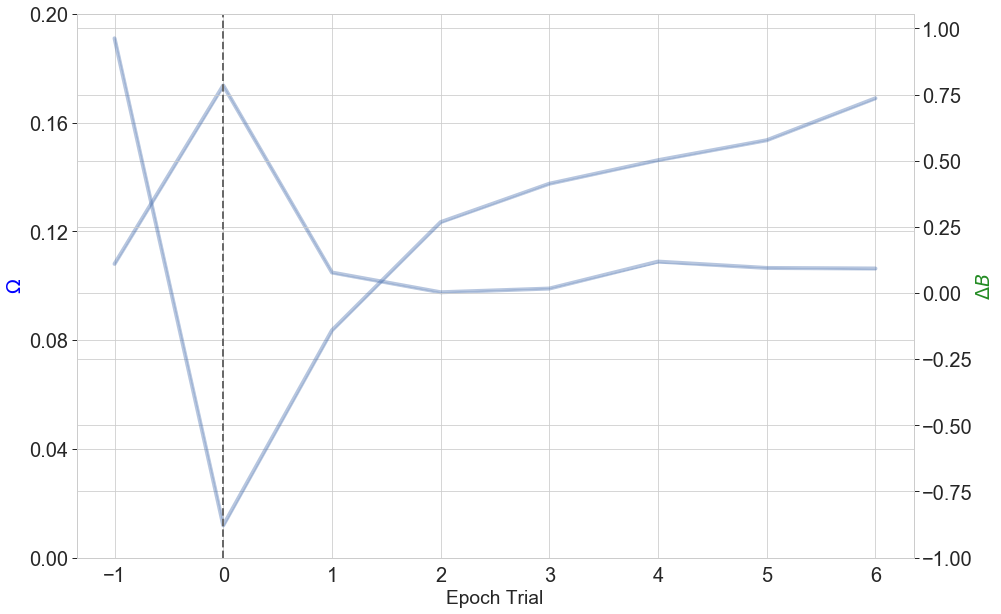

In [16]:
sns.set("paper", font_scale=2, rc={'figure.figsize':(15,10), 'xtick.labelsize': 20, 'ytick.labelsize': 20, 'font.size': 15}, style='whitegrid')


fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", data=filtered_obs_ls_df, ci=0, linewidth=4, alpha=0.4, palette='colorblind')
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=filtered_obs_ls_df,palette='colorblind', ax=ax2, ci=0,linewidth=4, alpha=0.4)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.24, 0.04))
ax2.set_yticks(np.arange(-1, 1.25, 0.25))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.savefig(fig_path+'all_ts_color.pdf', dpi=300)

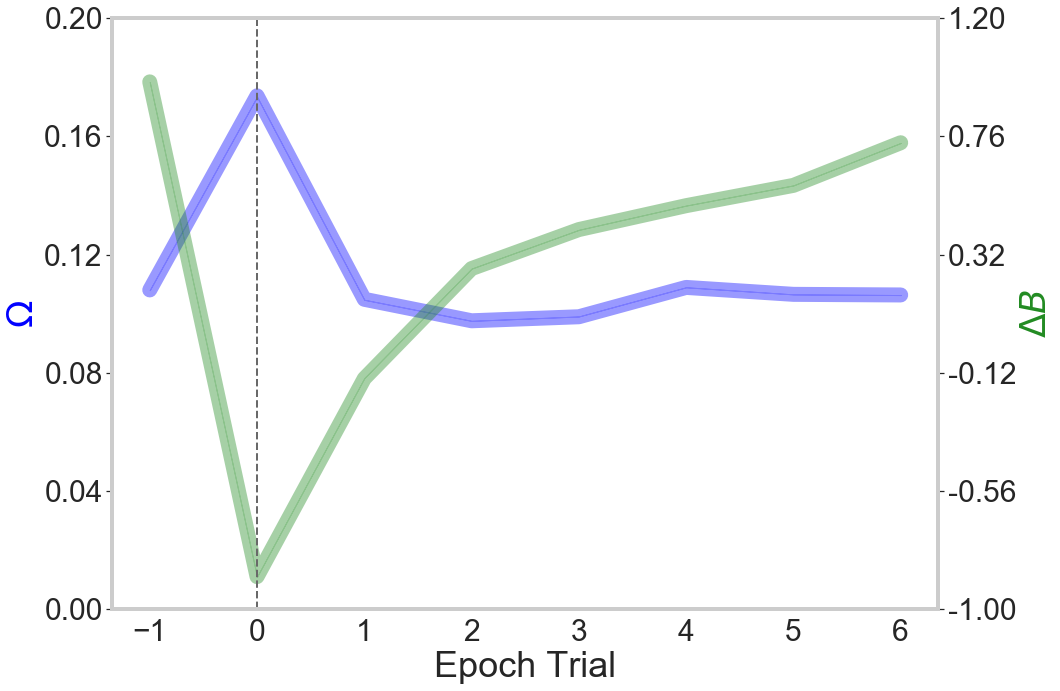

In [17]:
sns.set("notebook", font_scale=3, rc={'figure.figsize':(15,10), 'xtick.labelsize': 30, 'ytick.labelsize': 30, 'font.size': 20, 
                                      'axes.grid' : False,'axes.linewidth': 4,}, style='whitegrid', )

b_color = 'forestgreen'
cpp_color = 'blue'

fig, ax1 = plt.subplots()

sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=filtered_obs_ls_df, ci=0, linewidth=15, alpha=0.4)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=filtered_obs_ls_df, color=b_color, ax=ax2, ci=0,linewidth=15, alpha=0.4)
# ax2.set_ylabel(r'$\Delta B$')  
# ax1.set_ylabel(r'$\Omega$')  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  

ax1.set_xlabel('Epoch Trial')
plt.grid(False)

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.24, 0.04))
ax2.set_yticks(np.arange(-1, 1.3, 0.2))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')
plt.tight_layout()

import matplotlib.ticker
nticks = 6
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

from matplotlib.ticker import FormatStrFormatter

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(fig_path+'ts_color_v2.pdf', dpi=300)

# ~y axes in muted color~

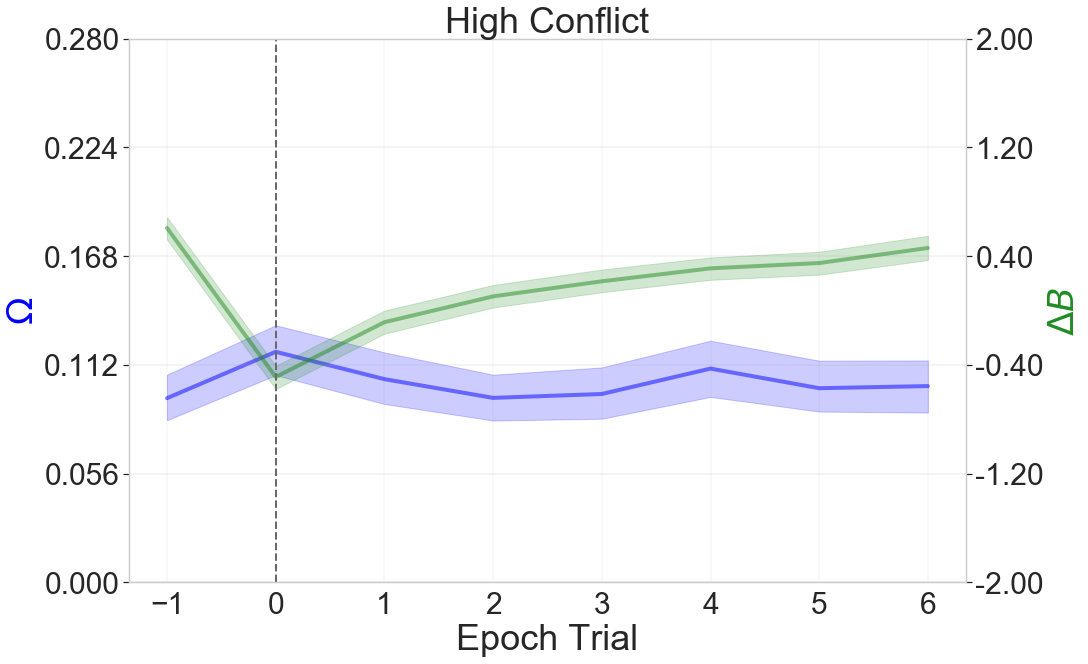

In [28]:
fig, ax1 = plt.subplots()

sns.set("notebook", font_scale=3, rc={'figure.figsize':(15,10), 'xtick.labelsize': 30, 'ytick.labelsize': 30, 'font.size': 20, "grid.linewidth": 0.2}, style='whitegrid', )


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Conflict')

import matplotlib.ticker
nticks = 6
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

from matplotlib.ticker import FormatStrFormatter

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


plt.savefig(fig_path+'hc_learning_ts_color.pdf', dpi=600)

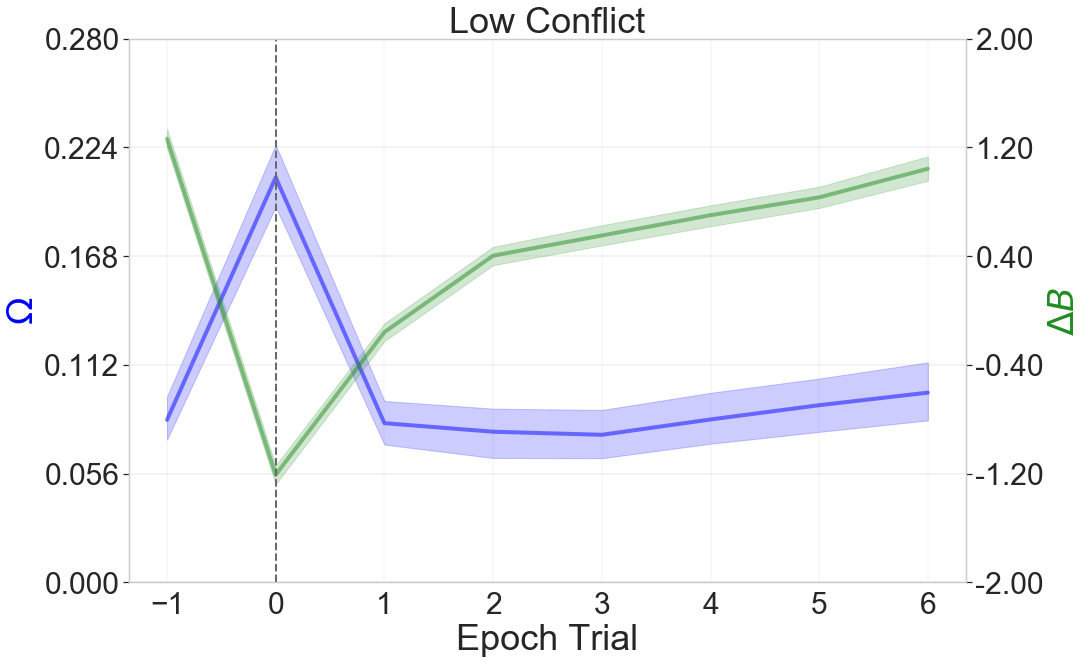

In [29]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Conflict')

import matplotlib.ticker
nticks = 6
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

from matplotlib.ticker import FormatStrFormatter

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(fig_path+'lc_learning_ts_color.pdf', dpi=600)

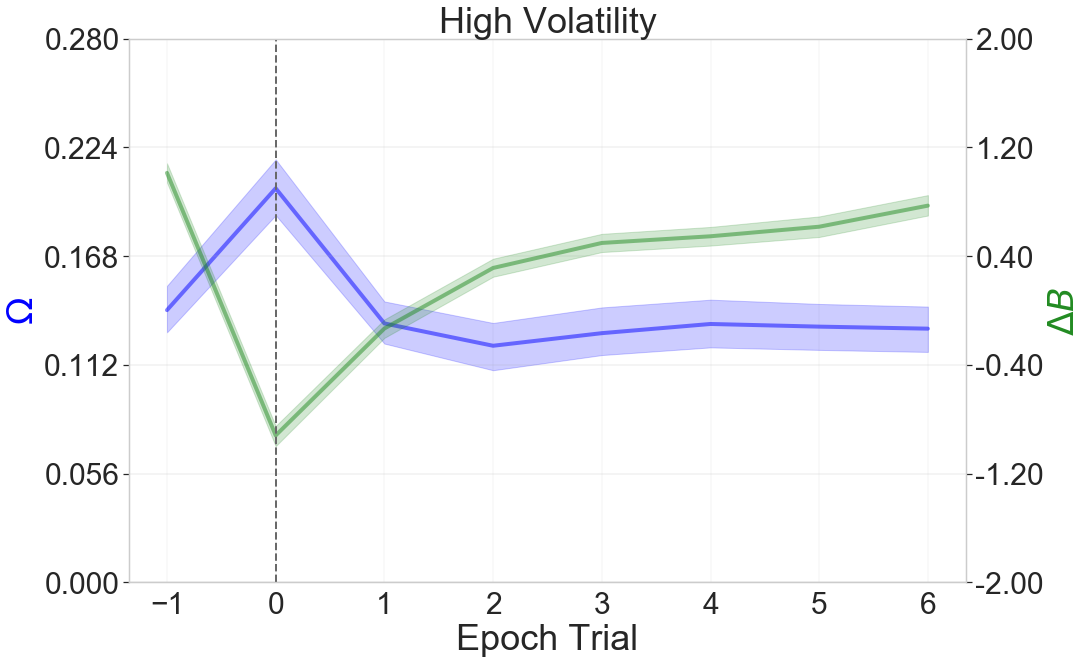

In [30]:
fig, ax1 = plt.subplots()

sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Volatility')

import matplotlib.ticker
nticks = 6
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

from matplotlib.ticker import FormatStrFormatter

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(fig_path+'hv_learning_ts_color.pdf', dpi=600)

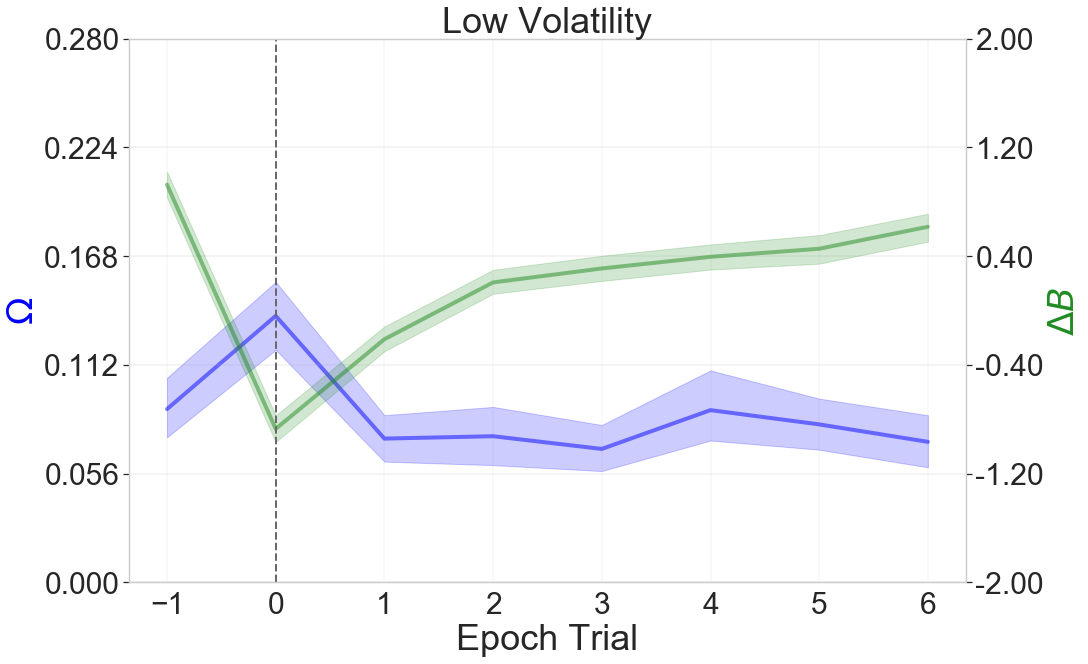

In [31]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Volatility')

import matplotlib.ticker
nticks = 6
ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

from matplotlib.ticker import FormatStrFormatter

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.savefig(fig_path+'lv_learning_ts_color.pdf', dpi=600)

# symbol only

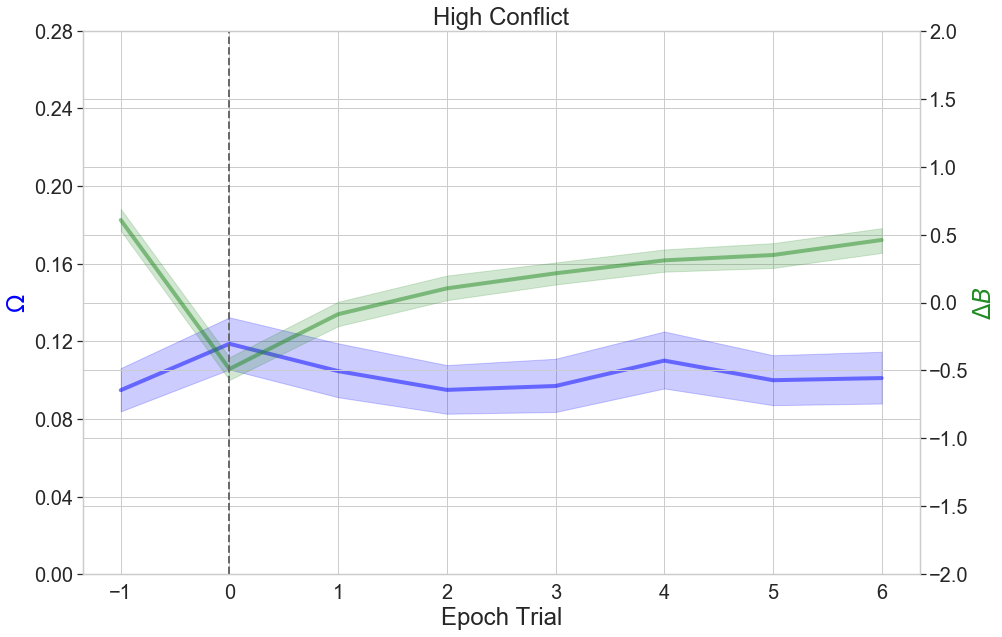

In [119]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Conflict')

plt.savefig(fig_path+'hc_learning_ts_color_symb.pdf', dpi=300)

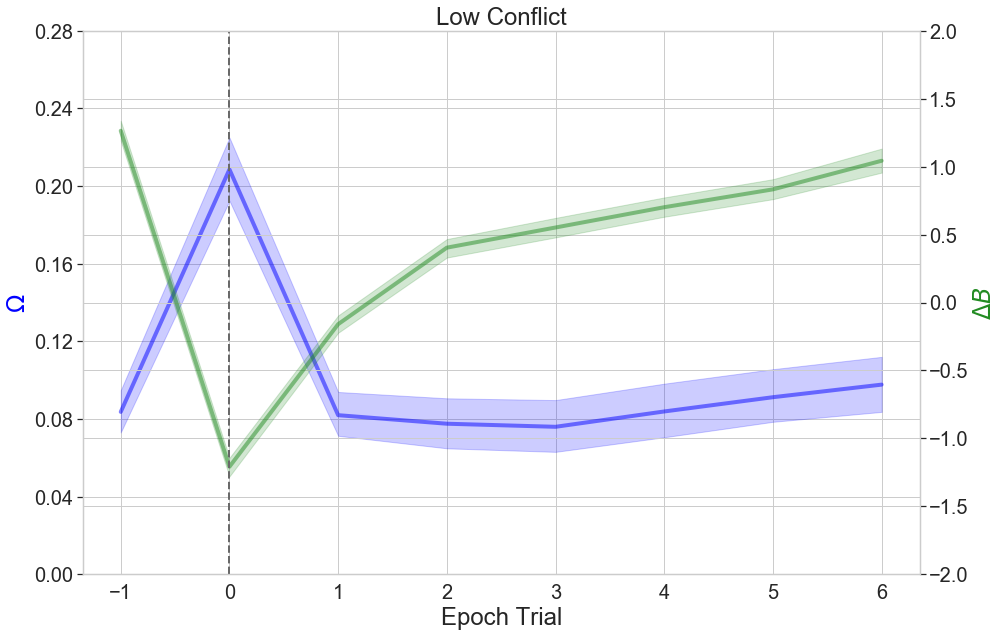

In [120]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lc, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lc, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Conflict')

plt.savefig(fig_path+'lc_learning_ts_color_symb.pdf', dpi=300)

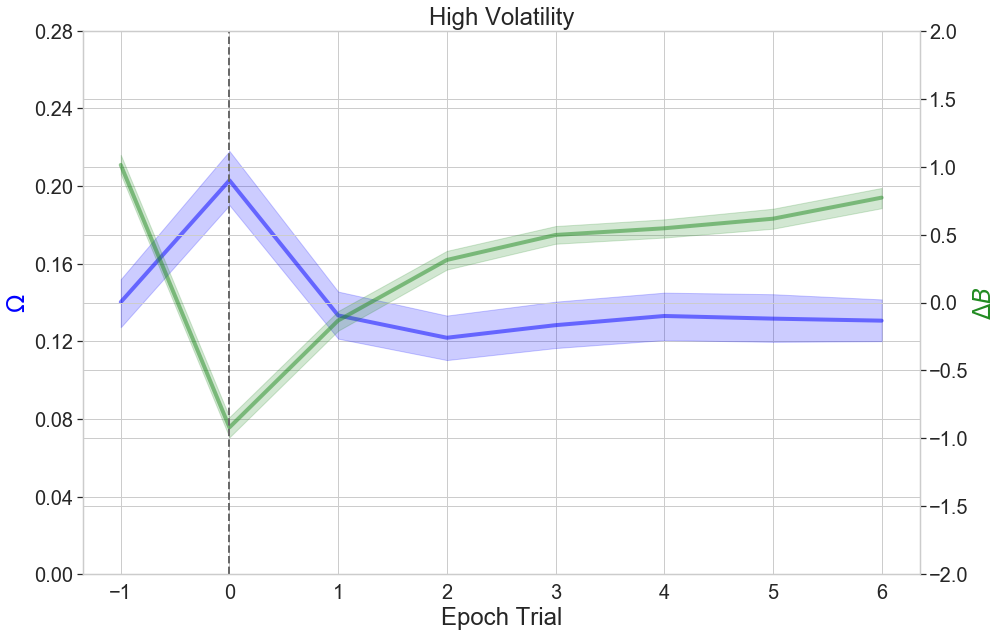

In [121]:
fig, ax1 = plt.subplots()

sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=hv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=hv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('High Volatility')

plt.savefig(fig_path+'hv_learning_ts_color_symb.pdf', dpi=300)

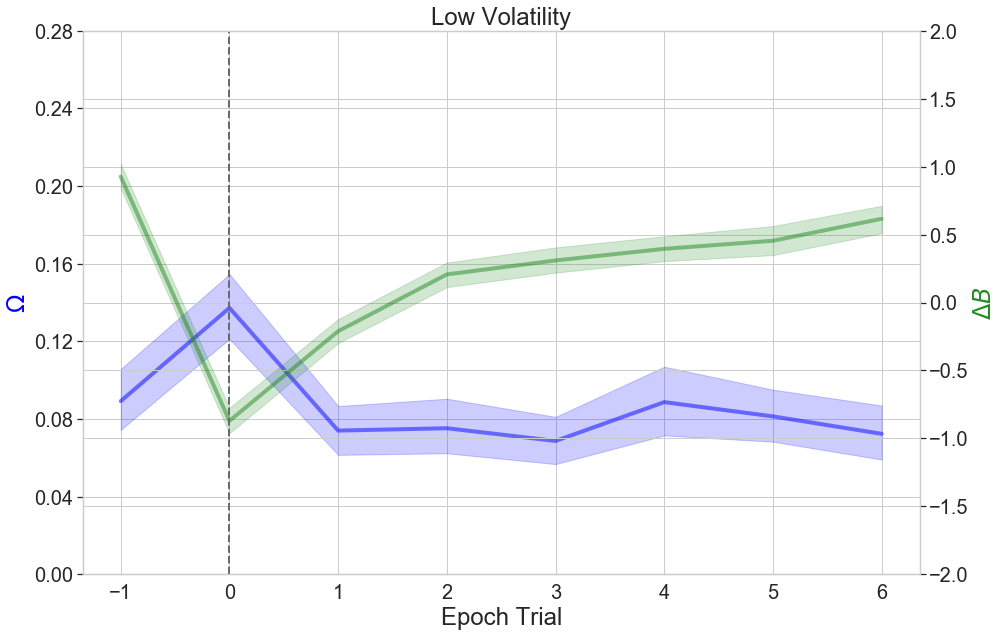

In [122]:
fig, ax1 = plt.subplots()


sns.lineplot(x="shifted_epoch_trial", y="cpp", color=cpp_color, data=lv, linewidth=4, alpha=0.5)
ax2 = plt.twinx()
sns.lineplot(x="shifted_epoch_trial", y="ideal_B", data=lv, color=b_color, ax=ax2,linewidth=4, alpha=0.5)
ax2.set_ylabel(r'$\Delta B$', color=b_color)  
ax1.set_ylabel(r'$\Omega$', color=cpp_color)  
# ax1.tick_params(axis='y', labelcolor=cpp_color)
# ax2.tick_params(axis='y', labelcolor=b_color)


ax1.set_xlabel('Epoch Trial')

ax1.set_xticks(range(-1, 7, 1))
ax1.set_yticks(np.arange(0, 0.30, 0.04))
ax2.set_yticks(np.arange(-2, 2.2, 0.5))

plt.axvline(0, linestyle='--', linewidth=2, color='dimgrey')

plt.title('Low Volatility')

plt.savefig(fig_path+'lv_learning_ts_color_symb.pdf', dpi=300)